# Importing Libraries

In [1]:
from utils import *
from normalizers import *
from FLPO import *
from viz import *
from UAV_Net import UAV_Net
from annealing import anneal
import pickle


# Defining UAV Net and Parameters

In [2]:
# a list of drones, each element containing two tuples,
# representing the coordinates of the initial deployment position
# the destination coordinates, and initial charge respectively
drones=[((35.0,32.0),(10.0,30.0),0.6),
        ((40.0,15.0),(8.0,3.0),0.4),
        ((20.0,4.0),(22.0,20.0),0.6),
        ((6.0,20.0),(38.0,22.0),0.6)]
drones = [
    ((10.0, 5.0), (45.0, 50.0), 0.7),  # Long distance, high charge
    ((3.0, 40.0), (50.0, 10.0), 0.5),   # Long distance, medium charge
    ((20.0, 15.0), (35.0, 35.0), 0.6),  # Moderate distance, medium charge
    ((5.0, 30.0), (25.0, 5.0), 0.4),    # Moderate distance, low charge
    ((40.0, 45.0), (10.0, 10.0), 0.8),  # Long distance, high charge
    ((30.0, 20.0), (5.0, 35.0), 0.6),   # Moderate distance, medium charge
    ((15.0, 10.0), (40.0, 40.0), 0.4),  # Moderate distance, low charge
    ((35.0, 5.0), (10.0, 45.0), 0.5),   # Long distance, medium charge
    ((25.0, 40.0), (20.0, 10.0), 0.7),  # Moderate distance, high charge
    ((45.0, 15.0), (5.0, 20.0), 0.3)    # Long distance, low charge
]


hexagon = create_block("hexagon", center=(30.0, 30.0), length=3.0, distortion="none")
square = create_block("square", center=(15.0, 25.0), length=3.5, distortion="rotated")
square = square[:1] + [(15.0 , 25.0)] +square[1:]# adding some nonconvexity
triangle = create_block("triangle", center=(30.0, 10.0), length=2.0, distortion="skewed")
blocks = [hexagon , square, triangle]
# blocks = None


N_stations = 4;
init_ugv = np.repeat(np.array([[0.5,0.9],]),N_stations,axis=0)
fcr = 25.0# Full Charge Range
ugv_factor = 10.0 # the cost factor for UGV transportation
distance = 'euclidean' # distance measure in the environment

beta_init = 1e-4 # initial beta value for the optimization.
beta_f = 1e8 # final beta value for the optimization
alpha = 1.5 # beta growth rate
purturb = 0.05 # random purturbation in optimization


uav_net = UAV_Net(drones, N_stations, init_ugv, blocks, ugv_factor, fcr, distance)






UAV Network was successfully created.


# Annealing Loop

In [16]:
obj = uav_net.objective
Y_s , Betas = anneal(obj , uav_net.stations, uav_net.bounds, beta_init, beta_f, alpha, purturb,'powell',True)

with open("Y_s", "wb") as fp:   #Pickling
    pickle.dump(Y_s, fp)
with open("Betas", "wb") as fp:   #Pickling
    pickle.dump(Betas, fp)

c:\Users\salar\Downloads\utils.py:15: RuntimeWarning: overflow encountered in exp
  y = a * np.log((np.log(np.exp(1/z0) + np.exp(z0*x - z0*x_off)))/(np.log(np.exp(1/z0) + np.exp(-z0))))


Beta: 1.00e-04  F.E.: -5.07350e+05
Beta: 1.50e-04  F.E.: -3.37971e+05
Beta: 2.25e-04  F.E.: -2.25068e+05
Beta: 3.38e-04  F.E.: -1.49772e+05
Beta: 5.06e-04  F.E.: -9.95623e+04
Beta: 7.59e-04  F.E.: -6.61479e+04
Beta: 1.14e-03  F.E.: -4.38130e+04
Beta: 1.71e-03  F.E.: -2.89500e+04
Beta: 2.56e-03  F.E.: -1.90229e+04
Beta: 3.84e-03  F.E.: -1.24368e+04
Beta: 5.77e-03  F.E.: -8.03557e+03
Beta: 8.65e-03  F.E.: -5.10924e+03
Beta: 1.30e-02  F.E.: -3.20261e+03
Beta: 1.95e-02  F.E.: -1.94815e+03
Beta: 2.92e-02  F.E.: -1.19033e+03
Beta: 4.38e-02  F.E.: -6.79654e+02
Beta: 6.57e-02  F.E.: -4.27868e+02
Beta: 9.85e-02  F.E.: -1.67425e+02
Beta: 1.48e-01  F.E.: -1.31800e+02
Beta: 2.22e-01  F.E.: -1.02507e+02
Beta: 3.33e-01  F.E.: -5.49412e+01
Beta: 4.99e-01  F.E.: 3.41901e+01
Beta: 7.48e-01  F.E.: 7.00479e+01
Beta: 1.12e+00  F.E.: -1.59265e-01
Beta: 1.68e+00  F.E.: 7.91370e+00
Beta: 2.53e+00  F.E.: 1.30561e+01
Beta: 3.79e+00  F.E.: 1.61411e+01
Beta: 5.68e+00  F.E.: 1.80214e+01
Beta: 8.52e+00  F.E.: 1.86

# Loading Optimized Parameters

In [3]:
with open("Y_s", "rb") as fp:   
    Y_s = pickle.load(fp)
with open("Betas", "rb") as fp:   
    Betas = pickle.load(fp)

# Getting the Routes

In [4]:
uav_net.return_stagewise_cost(Y_s[-1],Betas[-1])
P_ss = calc_associations(uav_net.D_ss,Betas[-1])
routes = calc_routs(P_ss)
print_routs(routes,N_stations)



Drone 1 --->f1 --->f2 --->[D1]
Drone 2 --->f4 --->f1 --->f3 --->[D2]
Drone 3 --->f1 --->[D3]
Drone 4 --->f4 --->f1 --->[D4]
Drone 5 --->f2 --->f1 --->[D5]
Drone 6 --->f1 --->[D6]
Drone 7 --->f1 --->f2 --->[D7]
Drone 8 --->f3 --->f2 --->[D8]
Drone 9 --->f2 --->f1 --->[D9]
Drone 10 --->f3 --->f1 --->[D10]

c:\Users\salar\Downloads\utils.py:15: RuntimeWarning: overflow encountered in exp
  y = a * np.log((np.log(np.exp(1/z0) + np.exp(z0*x - z0*x_off)))/(np.log(np.exp(1/z0) + np.exp(-z0))))


# Visualization

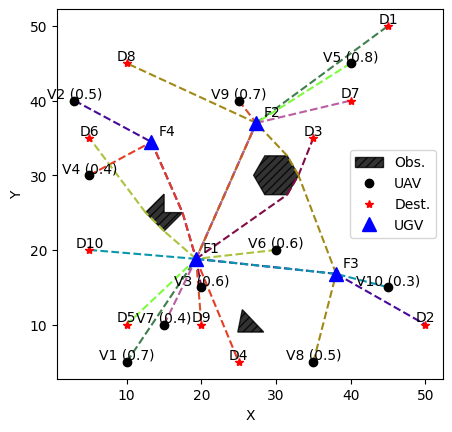

In [ ]:
scale = uav_net.ub - uav_net.lb
drift = uav_net.lb
f_s = Y_s[-1] * scale + drift
plot_drone_routes(drones, f_s, blocks, routes, fcr, ugv_factor,save_ = True)

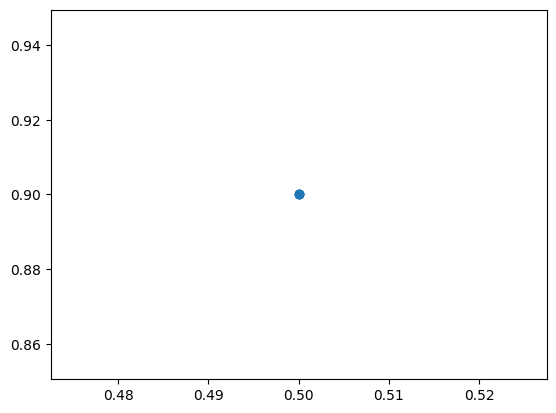

In [8]:
plt.scatter(init_ugv[:,0],init_ugv[:,1])

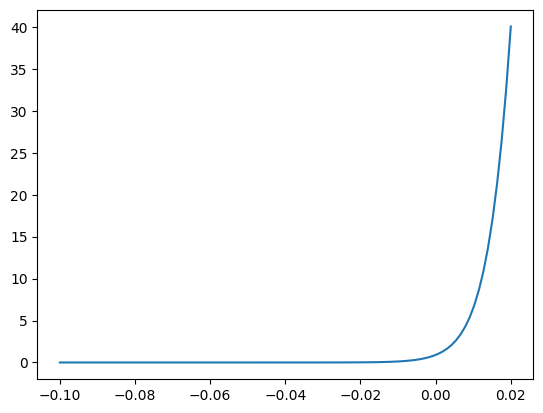

In [14]:
def penalty(x):
    a = 100
    z0 = 200
    x_off = 0.05
    y = a * np.log((np.log(np.exp(1/z0) + np.exp(z0*x - z0*x_off)))/(np.log(np.exp(1/z0) + np.exp(-z0))))
    return y
x = np.linspace(-0.1,0.02,100)
y = penalty(x)
plt.plot(x,y)

In [ ]:


# Function to check if line segment intersects circle and calculate intersection points
def line_circle_intersection(circle_center, radius, line_start, line_end):
    circle_center = np.array(circle_center)
    line_start = np.array(line_start)
    line_end = np.array(line_end)
    d = line_end - line_start
    f = line_start - circle_center
    a = np.dot(d, d)
    b = 2 * np.dot(f, d)
    c = np.dot(f, f) - radius**2
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        return None

    discriminant = np.sqrt(discriminant)
    t1 = (-b - discriminant) / (2 * a+1e-8)
    t2 = (-b + discriminant) / (2 * a+1e-8)

    if not (0 <= t1 <= 1 or 0 <= t2 <= 1):
        return None

    intersection1 = line_start + t1 * d
    intersection2 = line_start + t2 * d

    return intersection1, intersection2

# Function to calculate the shorter arc between two points on a circle
def calculate_shorter_arc(circle_center, radius, point1, point2):
    def to_polar(point):
        x, y = point - circle_center
        return np.arctan2(y, x)

    theta1 = to_polar(point1)
    theta2 = to_polar(point2)

    if theta1 > theta2:
        theta1, theta2 = theta2, theta1

    arc_length1 = theta2 - theta1
    arc_length2 = 2 * np.pi + theta1 - theta2

    if arc_length1 < arc_length2:
        return theta1, theta2
    else:
        return theta2, theta1 + 2 * np.pi

# Function to get the path segments for each drone
def get_drone_path_segments(drone, route, stations):
    path_segments = []
    current_location = drone[0]

    for station_index in route:
        if station_index == len(stations):
            next_location = drone[1]
        else:
            next_location = stations[station_index]

        path_segments.append((current_location, next_location))
        current_location = next_location

    return path_segments






In [ ]:


def calculate_total_distance(node_locations, facility_locations, drone_routes, destination_location):
    total_distance = 0
    for i,route in enumerate(drone_routes):
        current_location = node_locations[i]
        for facility_id in route:
            facility_location = facility_locations[facility_id]
            distance = np.linalg.norm(current_location - facility_location)**2
            total_distance += distance
            current_location = facility_location
        total_distance += np.linalg.norm(current_location - destination_location)**2
    return total_distance

# Example usage
# facility_locations = np.array([[0, 0], [1, 1], [2, 2]])
# drone_routes = [[0, 1, 2], [1, 2, 0]]
# destination_location = np.array([3, 3])
# node_locations = np.array([[-1, 0], [0, -1]])
# total_distance = calculate_total_distance(node_locations,facility_locations, drone_routes, destination_location)
# print("Total squared Euclidean distance:", total_distance)

In [ ]:
# facility_locations=array([[ 2.07228833, -8.73629151],
#        [18.09195077, -1.62563933],
#        [ 5.08811618, -4.06133651],
#        [ 9.12843406, -3.52467192],
#        [11.66724514,  3.07327971]])
node_locations = array([[ -0.23594765,   0.40015721],
       [ -1.02126202,   2.2408932 ],
       [ -0.13244201,  -0.97727788],
       [ -1.04991158,  -0.15135721],
       [ -2.10321885,   0.4105985 ],
       [ -1.85595643,   1.45427351],
       [ -1.23896227,   0.12167502],
       [ -1.55613677,   0.33367433],
       [ -0.50592093,  -0.20515826],
       [ -1.6869323 ,  -0.85409574],
       [  2.44701018,  10.6536186 ],
       [  5.8644362 ,   9.25783498],
       [  7.26975462,   8.54563433],
       [  5.04575852,   9.81281615],
       [  6.53277921,  11.46935877],
       [  5.15494743,  10.37816252],
       [  4.11221425,   8.01920353],
       [  4.65208785,  10.15634897],
       [ -0.76970932, -13.79762015],
       [ -2.38732682, -15.30230275],
       [ -3.04855297, -16.42001794],
       [ -3.70627019, -13.0492246 ],
       [ -2.50965218, -15.4380743 ],
       [ -3.25279536, -14.22250964],
       [ -3.61389785, -15.21274028],
       [ -2.89546656, -14.6130975 ],
       [ -2.51080514, -16.18063218],
       [ -2.02818223, -14.57166813],
       [ 15.06651722,  10.3024719 ],
       [ 14.36567791,   9.63725883],
       [ 14.32753955,   9.64044684],
       [ 14.18685372,   8.2737174 ],
       [ 15.17742614,   9.59821906],
       [ 13.36980165,  10.46278226],
       [ 14.09270164,  10.0519454 ],
       [ 15.72909056,  10.12898291],
       [ 16.13940068,   8.76517418],
       [ 25.40234164,  -0.68481009],
       [ 24.12920285,  -0.57884966],
       [ 24.68844747,   0.05616534],
       [ 23.83485016,   0.90082649],
       [ 25.46566244,  -1.53624369],
       [ 26.48825219,   1.89588918],
       [ 26.17877957,  -0.17992484],
       [ 23.92924738,   1.05445173],
       [ 24.59682305,   1.22244507]])
destination_location= (13.0,-3.0)
drones_2 = [[node,destination_location,1.0] for node in node_locations]

In [ ]:
raw_routs = [array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]]), array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]]), array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]]), array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]]), array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]]), array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])]
first_hop = [np.argwhere(raw_routs[0][i]==1)[0,0] for i in range(len(raw_routs[0]))]
routes = []
for i in range(len(raw_routs[0])):
  route=[];route.append(first_hop[i]);
  now = first_hop[i]
  for j in range(1,len(raw_routs)):
    try:
      next = np.argwhere(raw_routs[j][now,:]==1)[0,0]
    except:
      continue
    route.append(next)
    now = next
  routes.append(route[:-1])
drone_routes = routes

In [ ]:
total_distance = calculate_total_distance(node_locations,facility_locations, drone_routes, destination_location)
print("Total squared Euclidean distance:", total_distance)

Total squared Euclidean distance: 4746.40340279128


In [ ]:
# a list of drones, each element containing two tuples,
# representing the coordinates of the initial deployment position
# the destination coordinates, and initial charge respectively
drones=[((35.0,32.0),(10.0,30.0),0.6),
        ((40.0,15.0),(8.0,3.0),0.4),
        ((20.0,4.0),(22.0,20.0),0.6),
        ((6.0,20.0),(38.0,22.0),0.6)]
drones = [
    ((10.0, 5.0), (45.0, 50.0), 0.7),  # Long distance, high charge
    ((3.0, 40.0), (50.0, 10.0), 0.5),   # Long distance, medium charge
    ((20.0, 15.0), (35.0, 35.0), 0.6),  # Moderate distance, medium charge
    ((5.0, 30.0), (25.0, 5.0), 0.4),    # Moderate distance, low charge
    ((40.0, 45.0), (10.0, 10.0), 0.8),  # Long distance, high charge
    ((30.0, 20.0), (5.0, 35.0), 0.6),   # Moderate distance, medium charge
    ((15.0, 10.0), (40.0, 40.0), 0.4),  # Moderate distance, low charge
    ((35.0, 5.0), (10.0, 45.0), 0.5),   # Long distance, medium charge
    ((25.0, 40.0), (20.0, 10.0), 0.7),  # Moderate distance, high charge
    ((45.0, 15.0), (5.0, 20.0), 0.3)    # Long distance, low charge
]
random.seed(42)  # You can choose any number as the seed
def create_similar_values(original_tuple):
    return tuple(original_value + random.uniform(-1.0, 1.0) for original_value in original_tuple)

extended_drones = []
for drone in drones:
    for _ in range(10):  # Create 9 similar sublists
        new_start = create_similar_values(drone[0])
        new_end = create_similar_values(drone[1])
        new_charge = drone[2] + random.uniform(-0.05, 0.05)
        new_drone = (new_start, new_end, new_charge)
        extended_drones.append(new_drone)
# a list of initial deployment location of charging UGVs, could be random.
# the size of the list determines the number of charging stations
print(len(extended_drones))


blocks = [
    ((30.0, 30.0), 3.0),  # Large obstacle, centrally located
    ((15.0, 25.0), 1.50),    # Smaller obstacle, near a cluster of start/destination points
    ((30.0, 10.0), 2.00),
]
fcr = 1e8# Full Charge Range
ugv_factor = 0 # the cost factor for UGV transportation
distance = 'sqeuclidean' # distance measure in the environment

beta_init = 1e-4 # initial beta value for the optimization.
beta_f = 1e8 # final beta value for the optimization
alpha = 3 # beta growth rate
purturb = 0.5e-1 # random purturbation in optimization

env=uav_flpo(drones_2,5,blocks=None,
             ugv_factor=ugv_factor,fcr=fcr,distance=distance)
env.train(beta_init=beta_init,beta_f=beta_f,alpha=alpha,
          purturb=purturb,method='powell',verbos=1)

100
Beta: 1.0000e-04  Cost: -2.38140e+01
Beta: 3.0000e-04  Cost: -7.93799e+00
Beta: 9.0000e-04  Cost: -2.64597e+00
Beta: 2.7000e-03  Cost: -8.81963e-01
Beta: 8.1000e-03  Cost: -2.93963e-01
Beta: 2.4300e-02  Cost: -9.79627e-02
Beta: 7.2900e-02  Cost: -3.26294e-02
Beta: 2.1870e-01  Cost: -1.08518e-02
Beta: 6.5610e-01  Cost: -3.59254e-03
Beta: 1.9683e+00  Cost: -1.17275e-03
Beta: 5.9049e+00  Cost: -3.66195e-04
Beta: 1.7715e+01  Cost: -9.73333e-05
Beta: 5.3144e+01  Cost: -7.71616e-06
Beta: 1.5943e+02  Cost: 1.75434e-05
Beta: 4.7830e+02  Cost: 1.85035e-05
Beta: 1.4349e+03  Cost: 1.91138e-05
Beta: 4.3047e+03  Cost: 1.95265e-05
Beta: 1.2914e+04  Cost: 1.80883e-05
Beta: 3.8742e+04  Cost: 1.86840e-05
Beta: 1.1623e+05  Cost: 2.04862e-05
Beta: 3.4868e+05  Cost: 1.93686e-05
Beta: 1.0460e+06  Cost: 1.85869e-05
Beta: 3.1381e+06  Cost: 1.83793e-05
Beta: 9.4143e+06  Cost: 1.93629e-05
Beta: 2.8243e+07  Cost: 1.94679e-05
Beta: 8.4729e+07  Cost: 1.80883e-05




Drone 1 --->f1 --->f3 --->[D1]
Drone 2 --->f1 --->f3 --->[D2]
Drone 3 --->f1 --->f3 --->[D3]
Drone 4 --->f1 --->f3 --->[D4]
Drone 5 --->f1 --->f3 --->[D5]
Drone 6 --->f1 --->f3 --->[D6]
Drone 7 --->f1 --->f3 --->[D7]
Drone 8 --->f1 --->f3 --->[D8]
Drone 9 --->f1 --->f3 --->[D9]
Drone 10 --->f1 --->f3 --->[D10]
Drone 11 --->f4 --->[D11]
Drone 12 --->f4 --->[D12]
Drone 13 --->f4 --->[D13]
Drone 14 --->f4 --->[D14]
Drone 15 --->f4 --->[D15]
Drone 16 --->f4 --->[D16]
Drone 17 --->f4 --->[D17]
Drone 18 --->f4 --->[D18]
Drone 19 --->f5 --->f3 --->[D19]
Drone 20 --->f5 --->f3 --->[D20]
Drone 21 --->f5 --->f3 --->[D21]
Drone 22 --->f5 --->f3 --->[D22]
Drone 23 --->f5 --->f3 --->[D23]
Drone 24 --->f5 --->f3 --->[D24]
Drone 25 --->f5 --->f3 --->[D25]
Drone 26 --->f5 --->f3 --->[D26]
Drone 27 --->f5 --->f3 --->[D27]
Drone 28 --->f5 --->f3 --->[D28]
Drone 29 --->f4 --->[D29]
Drone 30 --->f4 --->[D30]
Drone 31 --->f4 --->[D31]
Drone 32 --->f4 --->[D32]
Drone 33 --->f4 --->[D33]
Drone 34 --->f4 --

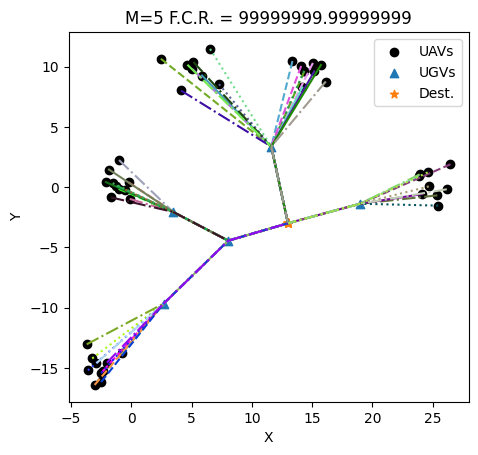

In [ ]:
env.print_routs()
env.plot_routs(show_info=0,show_nums=0,save=1,show_ugv=0)

In [ ]:
print('total cost: ',env.return_total_cost())
print('If all drones went directly to destintaion the cost would be: ',env.return_direct_cost())

total cost:  4787.302881233575
If all drones went directly to destintaion the cost would be:  689.9112061479769


IndexError: index 6 is out of bounds for axis 0 with size 6

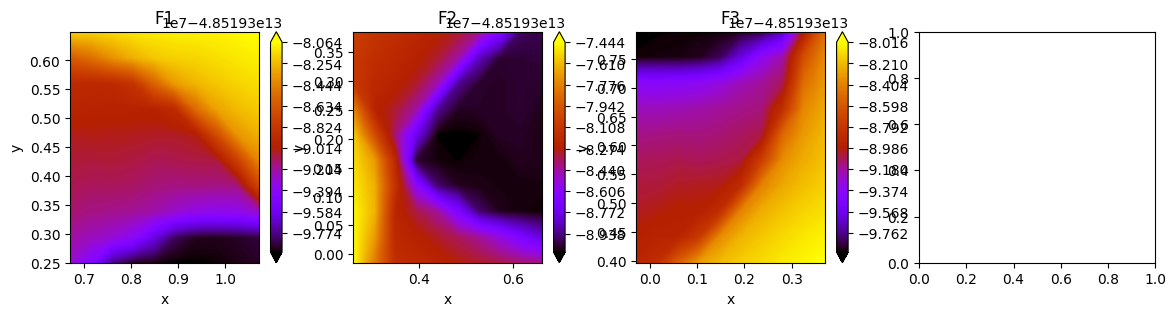

In [11]:


params_opt = Y_s[-1].ravel()



# Initialize the figure for 3 subplots (heatmaps) since we now have 6 parameters,

# making 3 pairs to vary

fig, axs = plt.subplots(1, 4, figsize=(14, 3))



# Create a meshgrid for the pair of parameters we want to vary, which was missing in the previous code





# Generate heatmaps for each pair of parameters out of the 6
radius = 0.2
for i, (x_param_idx, y_param_idx) in enumerate([(0, 1), (2, 3), (4, 5), (6,7)]):
    xx = np.linspace(params_opt[x_param_idx]-radius, params_opt[x_param_idx]+radius, 10)
    yy = np.linspace(params_opt[y_param_idx]-radius, params_opt[y_param_idx]+radius, 10)
    X, Y = np.meshgrid(xx, yy)
    Z = np.zeros_like(X)  # Initialize function value matrix
    for x_idx, x in enumerate(xx):
        for y_idx, y in enumerate(yy):
            # Create an array with all parameters set to their corresponding value in 'params_opt'
            params = params_opt.copy()
            # Set the two parameters we are varying to their respective values in the grid
            params[x_param_idx] = x
            params[y_param_idx] = y

            # Compute the function value with these parameters
            Z[x_idx, y_idx] = uav_net.objective(params.reshape(-1,2),1e-8)/uav_net.cost_normalizer*uav_net.scale

    # Plot heatmap
    ax = axs.flat[i]  # Use flat indexing since we have a 2x2 subplot array
    c = ax.contourf(X, Y, Z,1000, cmap='gnuplot',extend='both')
    ax.set_title(f'F{i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.colorbar(c, ax=ax)

# Hide the last subplot as it's not needed
#axs[1, 1].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

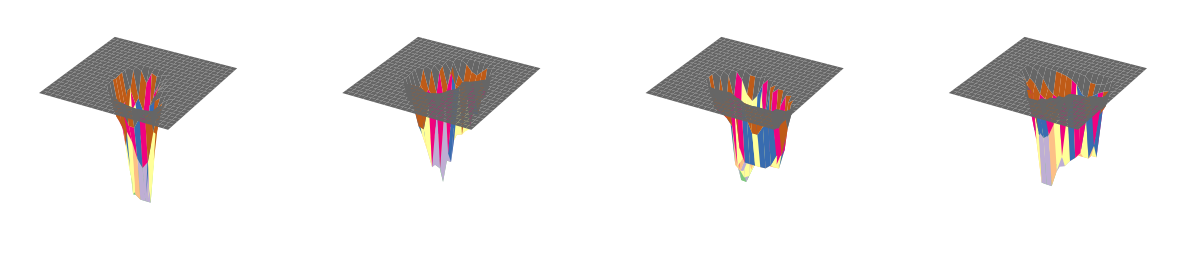

In [34]:
from mpl_toolkits.mplot3d import Axes3D
params_opt = Y_s[-1].ravel()
# Adjust the grid range for 3D plot resolution

beta=1e8
# Initialize the figure for 3 subplots (3D plots)
fig = plt.figure(figsize=(15,5))
r=1
# Generate 3D plots for each pair of parameters out of the 6
for i, (x_param_idx, y_param_idx) in enumerate([(0, 1), (2, 3), (4, 5),(6,7)]):
    # Create a meshgrid for the pair of parameters we want to vary
    xx = np.linspace(params_opt[x_param_idx]-r, params_opt[x_param_idx]+r, 25)
    yy = np.linspace(params_opt[y_param_idx]-r, params_opt[y_param_idx]+r, 25)
    X, Y = np.meshgrid(xx, yy)
    Z = np.zeros_like(X)  # Initialize function value matrix

    for x_idx, x in enumerate(xx):
        for y_idx, y in enumerate(yy):
            # Create an array with all parameters set to their corresponding value in 'params_opt'
            params = params_opt.copy()
            # Set the two parameters we are varying to their respective values in the grid
            params[x_param_idx] = x
            params[y_param_idx] = y

            # Compute the function value with these parameters
            Z[x_idx, y_idx] = uav_net.objective(params.reshape(-1,2), beta)

    # Create a 3D subplot
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='Accent', edgecolor='none')
    #ax.set_title(f'Charging Node {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('F')
    #fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    ax.axis('off')


plt.show()

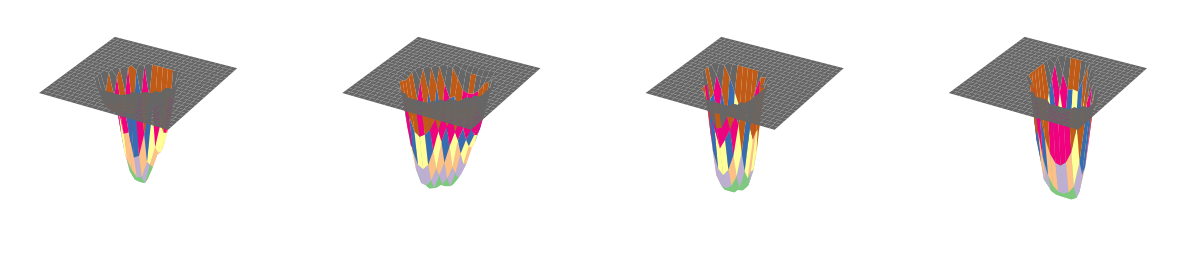

In [ ]:
from matplotlib.animation import FFMpegWriter

# Assuming 'env.params' and 'env.objective' are defined
params_opt = env.params
r = 1

# Metadata for the animation
metadata = dict(title='3D Plots Animation', artist='Matplotlib', comment='Animation of plots changing with beta.')
writer = FFMpegWriter(fps=2, metadata=metadata)

fig = plt.figure(figsize=(15,5))

with writer.saving(fig, "beta_animation.mp4", 100):
    for beta in np.logspace(-8, 2, num=20):  # From 1e-8 to 100, factor of 10
        fig.clf()  # Clear the figure to draw the new frame
        for i, (x_param_idx, y_param_idx) in enumerate([(0, 1), (2, 3), (4, 5), (6, 7)]):
            xx = np.linspace(params_opt[x_param_idx]-r, params_opt[x_param_idx]+r, 25)
            yy = np.linspace(params_opt[y_param_idx]-r, params_opt[y_param_idx]+r, 25)
            X, Y = np.meshgrid(xx, yy)
            Z = np.zeros_like(X)

            for x_idx, x in enumerate(xx):
                for y_idx, y in enumerate(yy):
                    params = params_opt.copy()
                    params[x_param_idx] = x
                    params[y_param_idx] = y
                    Z[x_idx, y_idx] = env.objective(params.reshape(-1,2), beta)

            ax = fig.add_subplot(1, 4, i+1, projection='3d')
            ax.plot_surface(X, Y, Z, cmap='Accent', edgecolor='none')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('F')
            ax.axis('off')

        writer.grab_frame()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Assuming 'env.params' and 'env.objective' are defined
params_opt = env.params
r = 1

fig = plt.figure(figsize=(15, 5))

# Preparation function: clear the figure
def init():
    fig.clf()

# Animation function: this will be called sequentially
def animate(beta):
    fig.clf()  # Clear the figure to redraw
    for i, (x_param_idx, y_param_idx) in enumerate([(0, 1), (2, 3), (4, 5), (6, 7)]):
        xx = np.linspace(params_opt[x_param_idx]-r, params_opt[x_param_idx]+r, 50)
        yy = np.linspace(params_opt[y_param_idx]-r, params_opt[y_param_idx]+r, 50)
        X, Y = np.meshgrid(xx, yy)
        Z = np.zeros_like(X)

        for x_idx, x in enumerate(xx):
            for y_idx, y in enumerate(yy):
                params = params_opt.copy()
                params[x_param_idx] = x
                params[y_param_idx] = y
                Z[x_idx, y_idx] = env.objective(params.reshape(-1,2), beta)

        ax = fig.add_subplot(1, 4, i+1, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='Accent', edgecolor='none')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('F')
        ax.axis('off')

# Create a list of beta values to animate over
betas = np.logspace(-8, 2, num=25)

# Create the animation
anim = FuncAnimation(fig, animate, frames=betas, init_func=init, blit=False)

# Save the animation as a GIF
writer = PillowWriter(fps=2)
anim.save("beta_animation.gif", writer=writer)


<Figure size 1500x500 with 0 Axes>